In [111]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%load_ext cython


The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [112]:
%%cython
cimport numpy as np
import numpy as np

cdef double m = 40.0 * 1.66e-27  # カルシウムの質量
cdef double wy = 2 * np.pi * 1000e3  # y方向の角周波数
cdef double hbar = 1.054e-34  # J.s
cdef double Gamma = 2 * np.pi * 20.6e6  # Hz
cdef double lambda_ = 397e-9  # 冷却レーザーの波長
cdef double delta = 2 * np.pi * 10e6  # デチューン（Hz）
cdef double k = 2 * np.pi / lambda_
cdef double s =1 #120e-6 / (np.pi * (60e-6)**2) / ((np.pi / 3) * (2 * np.pi * hbar) / ((1 / Gamma) * lambda_**3))  # 強度
cdef double d = 30 #degree
cdef double sin(double d):
    cdef double sinc=np.sin(d/180*np.pi)
    return sinc

cdef double acceleration(double vy, double y):
    cdef double K = -hbar * k * Gamma * s*sin(d) / 2
    return -wy**2 * y + K / m / (1 + s + ((delta - k * vy*sin(d)) / (2 * Gamma))**2)

def verlet_method(np.ndarray[double, ndim=1] t, double dt, double y0, double vy0):
    cdef int len_t = len(t)
    cdef np.ndarray[double, ndim=1] y = np.zeros(len_t)
    cdef np.ndarray[double, ndim=1] vy = np.zeros(len_t)
    cdef int i
    
    y[0] = y0
    vy[0] = vy0

    # 初期位置の計算
    y[1] = y[0] + vy[0] * dt - 0.5 * acceleration(vy[0], y[0]) * dt**2

    for i in range(1, len_t - 1):
        y[i + 1] = 2 * y[i] - y[i - 1] + acceleration(vy[i], y[i]) * dt**2

        vy[i + 1] = (y[i + 1] - y[i - 1]) / (2 * dt)

    return y, vy, k*vy*sin(d)
print(sin(d))

In file included from /Users/miyamotomanari/.ipython/cython/_cython_magic_8695add301b9c8d08a9dd5ead0ff76e5.c:790:
In file included from /Users/miyamotomanari/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/miyamotomanari/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/miyamotomanari/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969:
/Users/miyamotomanari/opt/anaconda3/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
1 warning generated.
ld: warning: duplicate -rpath '/Users/miyamotomanari/opt/anaconda3/lib' ignored


0.49999999999999994


In [113]:
# 初期条件の設定
y0 = -50e-6
vy0 = 20
dt = 1e-8
t = np.arange(0, 1e-1, dt)

# Verlet法によるシミュレーション
y_verlet, vy_verlet, detun_list = verlet_method(t, dt, y0, vy0)




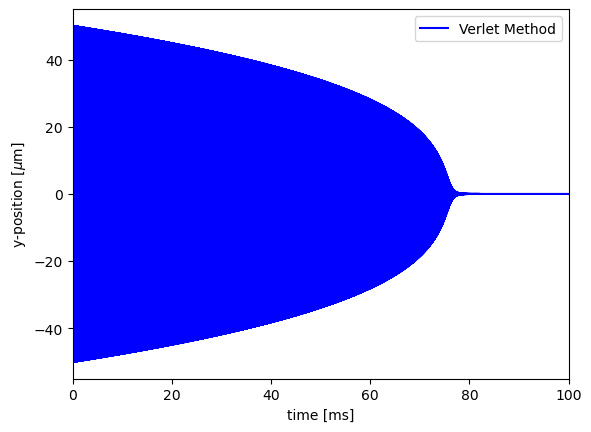

In [114]:
# 結果のプロット
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t * 10**3, y_verlet * 10**6, 'b', label='Verlet Method')
ax.set_xlabel('time [ms]')
ax.set_ylabel('y-position [$\mu$m]')
ax.set_xlim(0, 100)
plt.legend(loc='best')
plt.show()

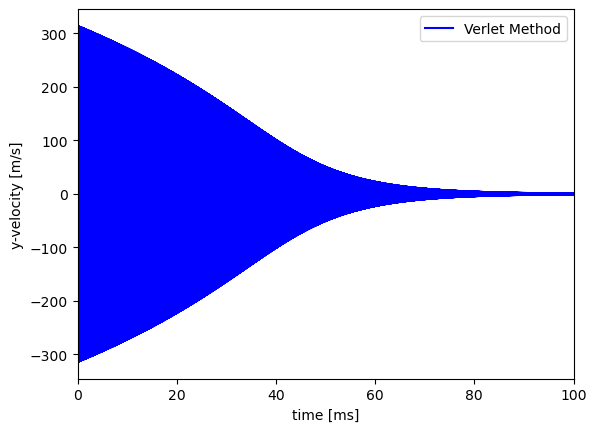

In [109]:
# 結果のプロット
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t * 10**3, vy_verlet, 'b', label='Verlet Method')
ax.set_xlabel('time [ms]')
ax.set_ylabel('y-velocity [m/s]')
ax.set_xlim(0, 100)
plt.legend(loc='best')
plt.show()

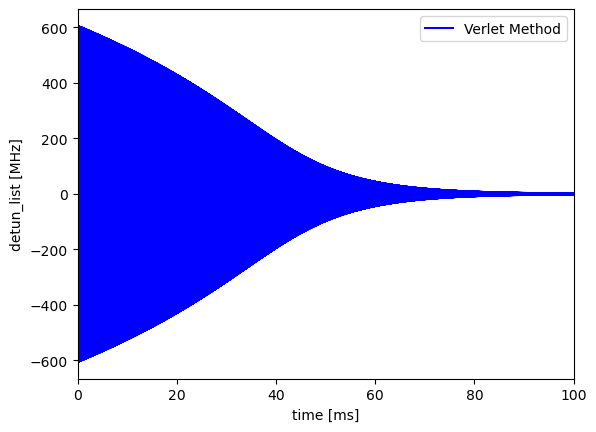

In [110]:
# 結果のプロット
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t * 10**3, detun_list*1e-6, 'b', label='Verlet Method')
ax.set_xlabel('time [ms]')
ax.set_ylabel('detun_list [MHz]')
ax.set_xlim(0, 100)
plt.legend(loc='best')
plt.show()